In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name="rock_paper_scissors",
    data_dir="rock-paper-scissors",
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [3]:
def preprocess(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    image = np.asanyarray(image)
    image = image.reshape(1, 28, 28)
    return image

In [4]:
classes = ["Rock", "Paper", "Scissors", "Empty"]
test_data = []
train_data = []

min_len_test = 124
min_len_train = 840

for image, label in tfds.as_numpy(dataset_test_raw):
    test_data.append((label, preprocess(image)))

for image, label in tfds.as_numpy(dataset_train_raw):
    train_data.append((label, preprocess(image)))

empty_image = np.full((1, 28, 28), 255)
for i in range(min_len_test):
    test_data.append((3, empty_image))
for i in range(min_len_train):
    train_data.append((3, empty_image))

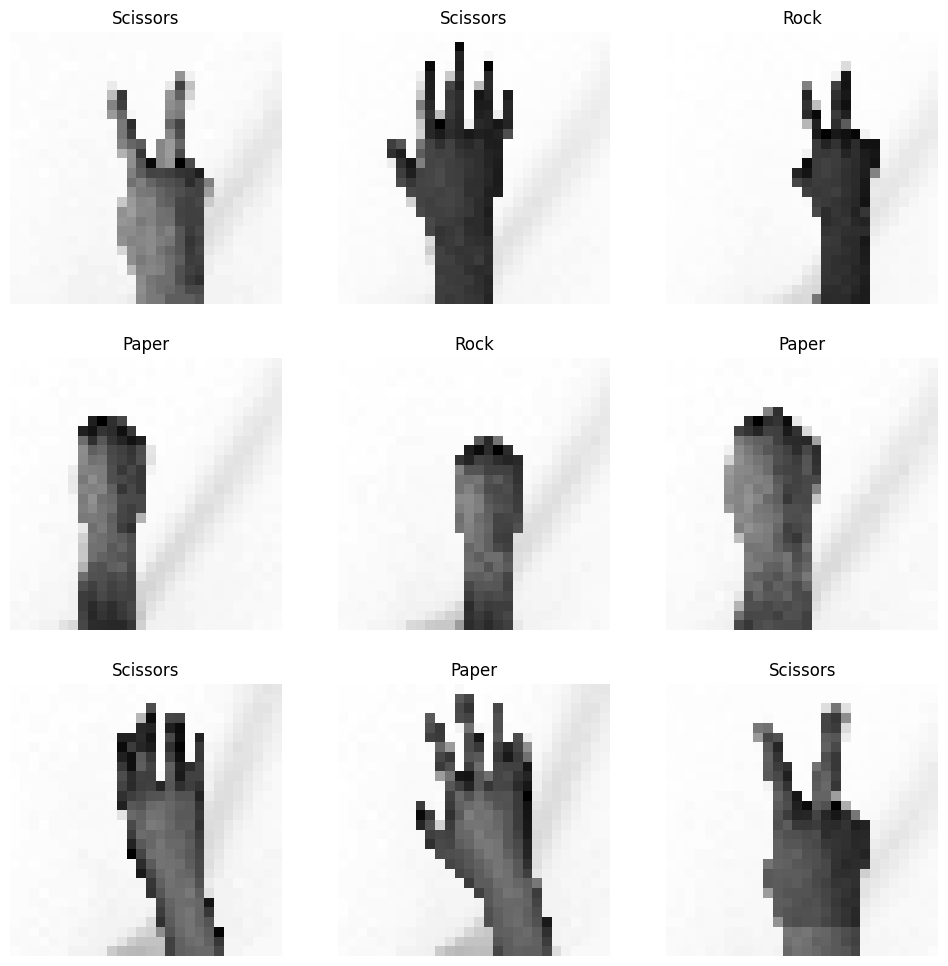

In [5]:
plt.figure(figsize=(12, 12))
plot_index = 0

for i in range(9):
    plot_index += 1
    plt.subplot(3, 3, plot_index)
    plt.imshow(test_data[i][1][0], cmap="gray")
    plt.title(classes[train_data[i][0]])
    plt.axis("off")

In [6]:
with open("rock_paper_scissors_test.csv", "w") as f:
    f.write("label," + ",".join([f"pixel{i + 1}" for i in range(28*28)]) + "\n")
    for label, image in test_data:
        f.write(f"{label},{','.join(map(str, image.flatten()))}\n")

with open("rock_paper_scissors_train.csv", "w") as f:
    f.write("label," + ",".join([f"pixel{i+1}" for i in range(28*28)]) + "\n")
    for label, image in train_data:
        f.write(f"{label},{','.join(map(str, image.flatten()))}\n")